In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)


# Load JSON data
data_path = "dev_enriched_log.json"
with open(data_path) as f:
    results = json.load(f)

# Extract relevant info including db_id
table_data = [{
    "db_id": item.get("db_id", "unknown"),
    "difficulty": item["difficulty"],
    "valid_query": item["valid_query"],
    "table_f1": item["tables"]["f1"],
    "row_f1": item["rows"]["f1"],
} for item in results]

df = pd.DataFrame(table_data)

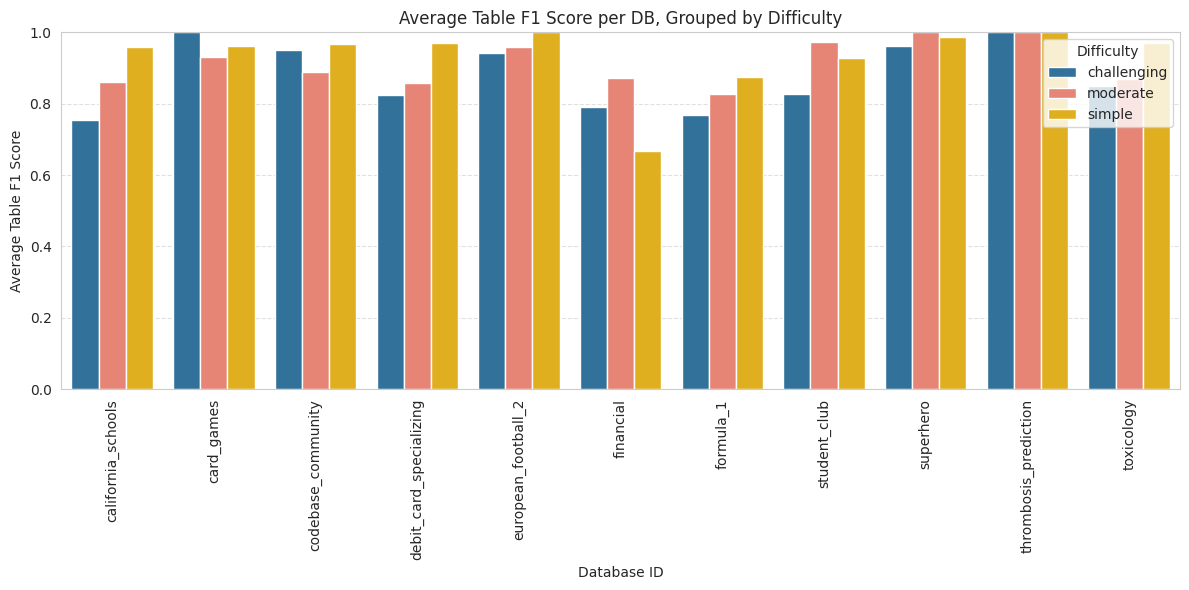

In [12]:

# Compute mean f1 per (db_id, difficulty)
grouped = df.groupby(["db_id", "difficulty"])["table_f1"].mean().reset_index()

# Plot grouped barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x="db_id", y="table_f1", hue="difficulty")

plt.title("Average Table F1 Score per DB, Grouped by Difficulty")
plt.ylabel("Average Table F1 Score")
plt.xlabel("Database ID")
plt.ylim(0, 1)
plt.legend(title="Difficulty")
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


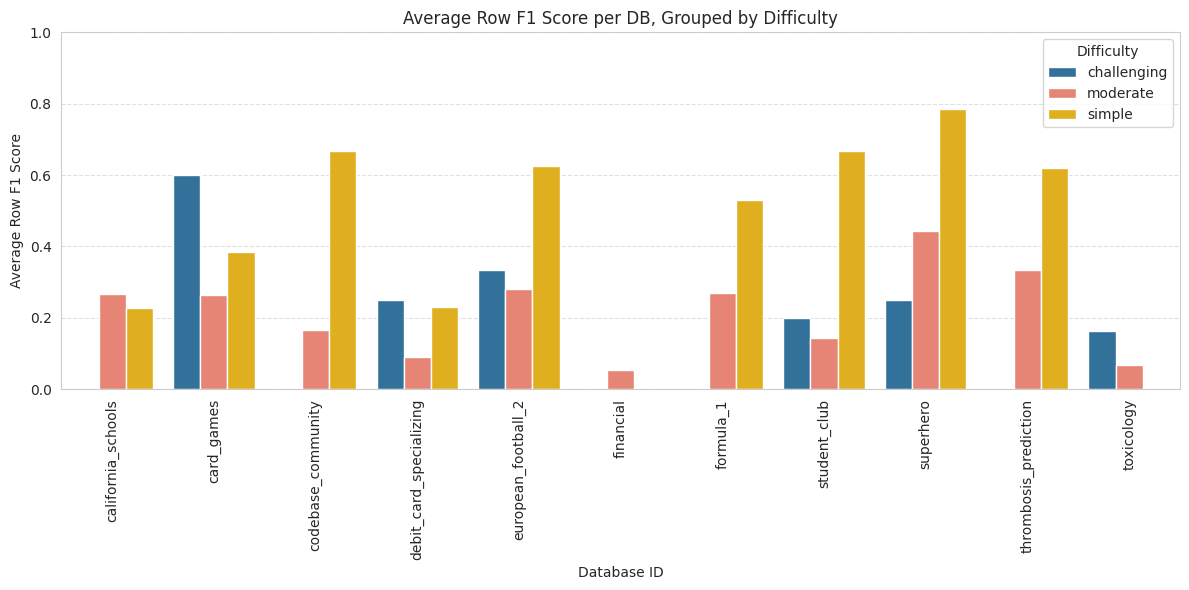

In [13]:
# Compute mean f1 per (db_id, difficulty)
grouped = df.groupby(["db_id", "difficulty"])["row_f1"].mean().reset_index()

# Plot grouped barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x="db_id", y="row_f1", hue="difficulty")

plt.title("Average Row F1 Score per DB, Grouped by Difficulty")
plt.ylabel("Average Row F1 Score")
plt.xlabel("Database ID")
plt.ylim(0, 1)
plt.legend(title="Difficulty")
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [14]:
# Plot cumulative (stacked) valid and invalid queries per db_id
validity_counts = df.groupby(["db_id", "valid_query"]).size().reset_index(name="count")

validity_counts


,db_id,valid_query,count
0,california_schools,False,8
1,california_schools,True,21
2,card_games,False,10
3,card_games,True,41
4,codebase_community,False,4
5,codebase_community,True,43
6,debit_card_specializing,False,8
7,debit_card_specializing,True,20
8,european_football_2,False,6
9,european_football_2,True,21


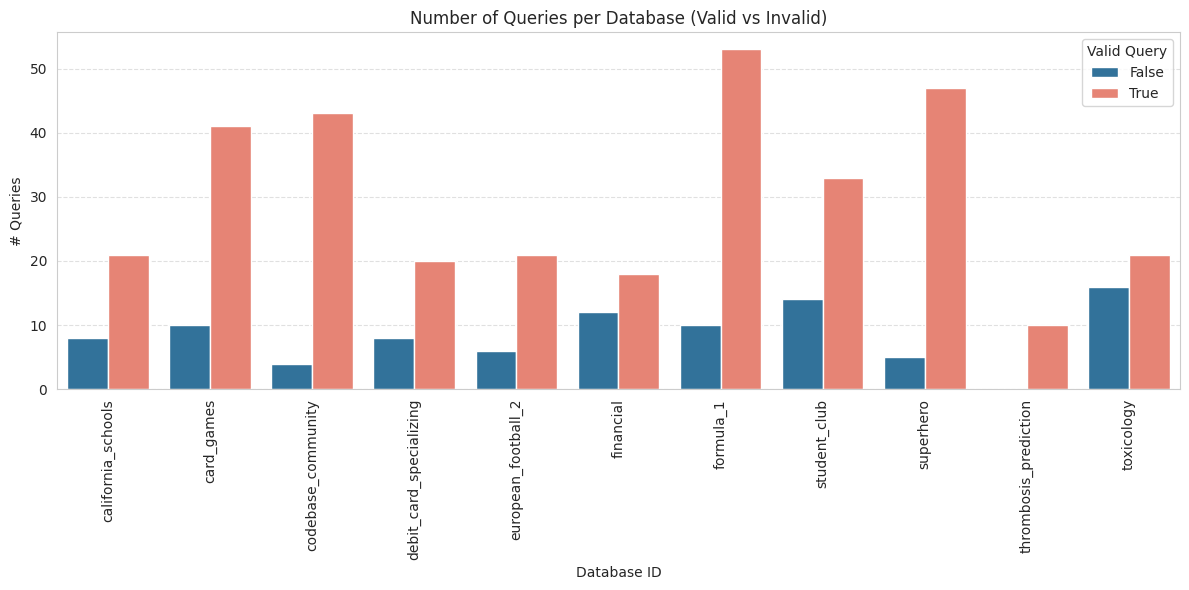

In [15]:

plt.figure(figsize=(12, 6))
sns.barplot(data=validity_counts, x="db_id", y="count", hue="valid_query")
plt.title("Number of Queries per Database (Valid vs Invalid)")
plt.ylabel("# Queries")
plt.xlabel("Database ID")
plt.xticks(rotation=90)
plt.legend(title="Valid Query")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()